In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [2]:
train_dir = r'Dataset/train'
validation_dir = r'Dataset/test'
test_dir = r'Dataset/validation'

## Data Preprocessing

In [4]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


Augmenting the training data

In [5]:
#generating batches for image data

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory( #we are using data from directory (dataset folder)
                                                    train_dir,
                                                    target_size=(150,150),
                                                    batch_size=10,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory( #we are using data from directory (dataset folder)
                                                    validation_dir,
                                                    target_size=(150,150),
                                                    batch_size=15,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
from tensorflow.keras import layers,models

## Creating Model

In [7]:
#sequential Model with 4 Conv2D layers with Max pooling layers,1 flattern layer and 2 Dense Layers

model=models.Sequential()

#Conv2D(filters,window dimension for filter,activation, input shape)
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
#Dense(no. of neurons,activation function)
model.add(layers.Dense(512,activation='relu'))

model.add(layers.Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [9]:
from tensorflow.keras import optimizers

#compiling the model by setting the learning rate and loss parameter
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),#lr=0.001
             metrics=['acc'])

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', patience=25)

In [11]:
history=model.fit(train_generator,
                 steps_per_epoch=150,#stopping point for generating the data
                 epochs=100,
                 validation_data=validation_generator,
                 validation_steps=50,
                 callbacks=[es])#total validation//batch size of validation_generator


Epoch 1/100
150/150 [==============================] - 29s 189ms/step - loss: 0.6983 - acc: 0.4995 - val_loss: 0.6861 - val_acc: 0.5347
Epoch 2/100
150/150 [==============================] - 29s 191ms/step - loss: 0.6886 - acc: 0.5267 - val_loss: 0.6700 - val_acc: 0.5947
Epoch 3/100
150/150 [==============================] - 29s 195ms/step - loss: 0.6789 - acc: 0.5665 - val_loss: 0.6727 - val_acc: 0.5773
Epoch 4/100
150/150 [==============================] - 29s 196ms/step - loss: 0.6775 - acc: 0.5578 - val_loss: 0.6538 - val_acc: 0.5920
Epoch 5/100
150/150 [==============================] - 29s 196ms/step - loss: 0.6519 - acc: 0.6156 - val_loss: 0.6254 - val_acc: 0.6480
Epoch 6/100
150/150 [==============================] - 30s 198ms/step - loss: 0.6317 - acc: 0.6448 - val_loss: 0.6417 - val_acc: 0.6333
Epoch 7/100
150/150 [==============================] - 30s 198ms/step - loss: 0.6248 - acc: 0.6535 - val_loss: 0.6076 - val_acc: 0.6707
Epoch 8/100
150/150 [===========================

Epoch 61/100
150/150 [==============================] - 35s 232ms/step - loss: 0.4343 - acc: 0.8031 - val_loss: 0.5113 - val_acc: 0.7640
Epoch 62/100
150/150 [==============================] - 35s 232ms/step - loss: 0.4621 - acc: 0.7996 - val_loss: 0.5495 - val_acc: 0.7733
Epoch 63/100
150/150 [==============================] - 35s 236ms/step - loss: 0.4245 - acc: 0.8103 - val_loss: 0.4967 - val_acc: 0.7920
Epoch 64/100
150/150 [==============================] - 35s 236ms/step - loss: 0.4685 - acc: 0.7978 - val_loss: 0.4722 - val_acc: 0.7813
Epoch 65/100
150/150 [==============================] - 37s 248ms/step - loss: 0.4705 - acc: 0.7647 - val_loss: 0.4628 - val_acc: 0.7800
Epoch 66/100
150/150 [==============================] - 36s 240ms/step - loss: 0.4458 - acc: 0.7865 - val_loss: 0.4889 - val_acc: 0.7853
Epoch 67/100
150/150 [==============================] - 36s 237ms/step - loss: 0.4224 - acc: 0.7958 - val_loss: 0.5098 - val_acc: 0.7787
Epoch 68/100
150/150 [===================

In [13]:
#save history to csv
hist_csv_file = 'history(augmented data).csv'
with open(hist_csv_file, mode='w') as f:
    pd.DataFrame(history.history).to_csv(f)

In [14]:
model.save('Augmented Data trained model.h5')

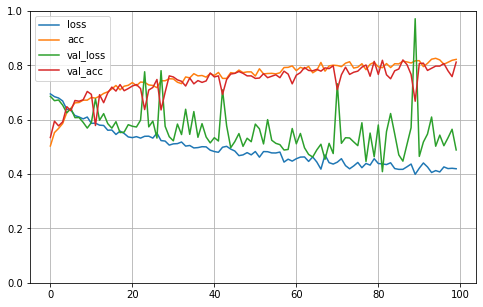

In [16]:
# pd.DataFrame(history.history).plot(figsize=(8,5))

pd.read_csv('history(augmented data).csv',index_col=0).plot(figsize=(8,5))
plt.gca().set_ylim(0,1)
plt.grid(True)


In [17]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(150,150),
                                                 batch_size=15,
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [19]:
model.evaluate(test_generator,steps=50) #output: [loss,accuracy]

50/50 [==============================] - 3s 67ms/step - loss: 0.4791 - acc: 0.8080


[0.4790537655353546, 0.8080000281333923]